# k Nearest Neighbors

## Imports

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats, integrate
import seaborn as sns
from sklearn.neighbors import KNeighborsRegressor

import pprint
p = pprint.PrettyPrinter(indent=4)

import config as config

%matplotlib inline


## Importing utilities object
+ imports dataset as lists (a training and test set)


In [2]:
%run utilities.py
util = Utilities({}, use_json=False)
master_DF = util.get_master_dataframe()

# add constructed features  
master_DF = util.generate_energy_measure(master_DF)
master_DF = util.generate_dance_measure(master_DF)

# normalize numeric values 
master_norm_DF = util.normalize_numeric_columns(master_DF) 


# partition into train, crossvalidation, and test sets 
train, cv, test = util.split_master_df(master_norm_DF)


In [3]:
from models.knn_model import kNeighborsManager

In [4]:
kman = kNeighborsManager()

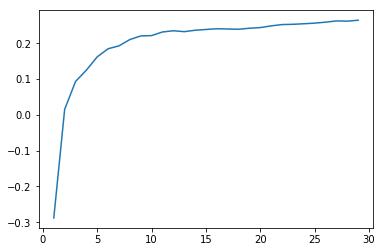

In [5]:
features = config.metadata_feaures + config.constructed_features

elbow = kman.build_score_list(train, cv, features, maxk=30, step=1)
sns.lineplot(elbow[:, 0], elbow[:, 1], )


Note that the elbow appears to be around values of k=5 and k=12 

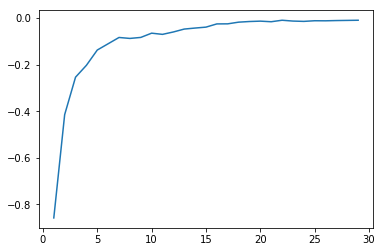

In [6]:
features = 'segments_avg tatums_avg beats_avg bars_avg sections_avg'.split()
elbow = kman.build_score_list(train, cv, features, maxk=30, step=1)
sns.lineplot(elbow[:, 0], elbow[:, 1], )


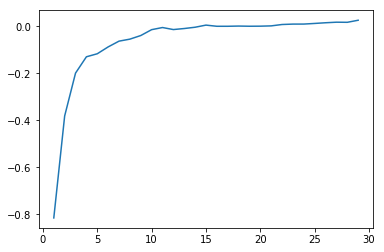

In [7]:
features = 'key loudness duration tempo time_signature'.split()
elbow = kman.build_score_list(train, cv, features, maxk=30, step=1)
sns.lineplot(elbow[:, 0], elbow[:, 1], )


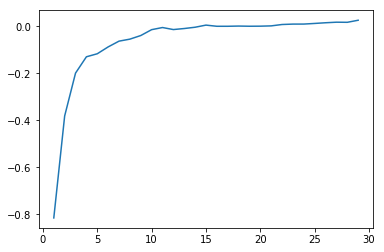

In [8]:
energy_names = ['energy1', 'energy2', 'energy3', 'energy4', 'energy']
dance_names = ['dance1', 'dance2', 'dance3', 'dance4']

dance_energy_list = dance_names + energy_names 

elbow = kman.build_score_list(train, cv, features, maxk=30, step=1)
sns.lineplot(elbow[:, 0], elbow[:, 1], )



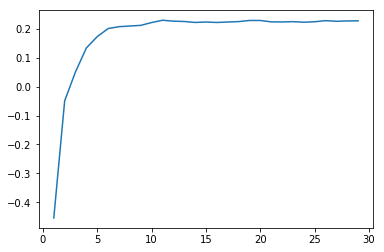

In [9]:
features = config.acoustic_features + config.metadata_feaures + config.constructed_features
elbow = kman.build_score_list(train, cv, features, maxk=30, step=1)
sns.lineplot(elbow[:, 0], elbow[:, 1], )




## Training best performer on test set 

In [10]:
features = config.acoustic_features + config.metadata_feaures + config.constructed_features
model = KNeighborsRegressor(n_neighbors=12)
X = train[features]
X_test = test[features]
y = train['song_hotttnesss']
y_test = test['song_hotttnesss']

model.fit(X, y)
model.score(X_test, y_test)




0.2540715124413693

In [11]:
kman.errors(train, test, features, 12)

(KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=12, p=2,
           weights='uniform'),
 {'MSE': 0.028587072403326922,
  'mean_abs': 0.13894746337735978,
  'mean_err': 0.16907711969195277},
 {'MSE': 0.032360184922178764,
  'mean_abs': 0.14846716572756288,
  'mean_err': 0.17988936856351118},
 0.20840991012941204)